In [1]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS
%config InlineBackend.figure_format ='retina'

In [2]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(56, 100%%, %d%%)" % random.randint(60, 100) #use this to change the colors if interested

In [3]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

In [4]:
mask = np.array(Image.open(path.join(d, "pika_0.jpg")))

In [5]:
text = open(path.join(d, 'pokemon.txt')).read()

In [6]:
# pre-processing the text a little bit
text = text.replace("HAN", "Han")
text = text.replace("LUKE'S", "Luke")

In [7]:
# adding specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

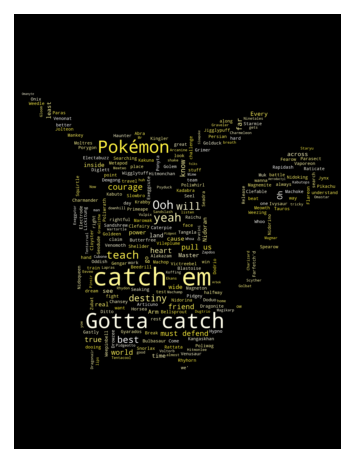

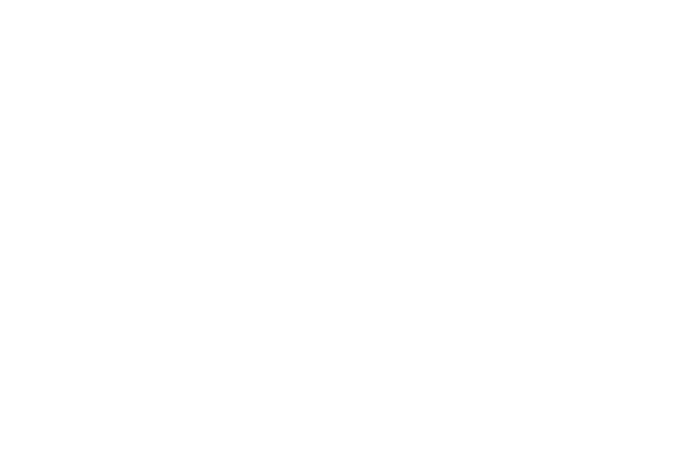

In [8]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)
# store default colored image
default_colors = wc.to_array()
#plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("catchemall.png")
plt.axis("off")
plt.figure()
#plt.title("Default colors")
#plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()